<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heavisde step function $\Theta$ is the derivative of the ReLU activation function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
#np.random.seed(0)

In [0]:
num_epochs = 1000
learning_rate = 0.1

In [857]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [858]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = np.random.random(size=(3,2)) - 0.5
    self.weights_2 = np.random.random(size=(3,1)) - 0.5

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    a_2 = z_2
    return z_1, a_1, z_2, a_2

In [860]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[1], [0], [-2]], dtype=np.float)
z_1, a_1, z_2, a_2 = m.forward(X)
print(0.25 * np.sum((a_2 - Y)**2))

0.5


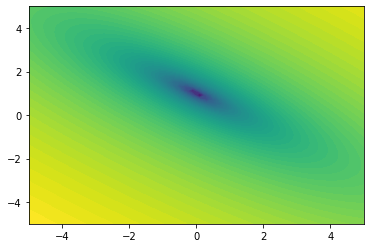

In [861]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
# Test plotting the loss versus weights
n = 50
test_weights = np.linspace(-5, 5, n)
loss = np.zeros((n, n))
for i in range(n):
  m.weights_2[0, 0] = test_weights[i]
  for j in range(n):
    m.weights_2[1, 0] = test_weights[j]
    z_1, a_1, z_2, a_2 = m.forward(X)
    loss[i, j] = 0.25 * np.sum((a_2 - Y)**2)
plt.figure()
plt.contourf(test_weights, test_weights, np.log(loss.T), levels=100)
plt.show()

In [862]:
num_epochs = 1000
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
#m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
#m.weights_2[0, 0] = 1.0
#m.weights_2[1, 0] = 0.0
#m.weights_2[2, 0] = 0.0
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum((a_2 - Y)**2)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2_1 has shape(4, 1)
  delta_2_1 = 0.5 * ( a_2 - Y)
  # Sum up over training examples
  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2_1[:, 0])
  m.weights_2[1, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 0])
  m.weights_2[2, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 1])
  weights_2_history.append(np.copy(m.weights_2))
weights_2_history = np.array(weights_2_history)

0 1.5392312305728817
100 0.020814775045357073
200 0.003372960401709102
300 0.0005465962345470958
400 8.857721662064216e-05
500 1.4354148104884995e-05
600 2.3261237559472187e-06
700 3.769538734339931e-07
800 6.108626952182277e-08
900 9.899174904598617e-09


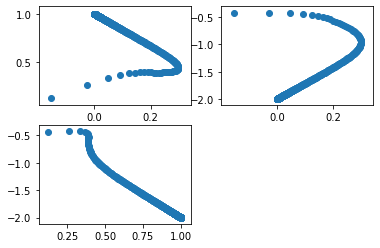

In [863]:
plt.figure()
ax = plt.subplot(2, 2, 1)
ax.scatter(weights_2_history[:, 0, 0], weights_2_history[:, 1, 0])
ax = plt.subplot(2, 2, 2)
ax.scatter(weights_2_history[:, 0, 0], weights_2_history[:, 2, 0])
ax = plt.subplot(2, 2, 3)
ax.scatter(weights_2_history[:, 1, 0], weights_2_history[:, 2, 0])
plt.show()

In [864]:
print(m.weights_1)

[[ 0. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [865]:
print(m.weights_2)

[[ 5.45188826e-05]
 [ 9.99909075e-01]
 [-1.99984450e+00]]
